In [12]:
# dependencies and setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read employment data by employment status
parent_data = pd.read_csv('../data/employment-statusbygender-ageofyoungestchild.csv')
parent_data.head()

,Age of youngest child,Mothers Full-time,Mothers Part-time,Fathers Full-time,Fathers Part-time
0,under 3 years,72.4,27.6,95.3,4.7
1,3 to 5 years,75.4,24.6,95.5,4.5
2,6 to 17 years,77.9,22.1,95.8,4.2
3,under 18 years,76.3,23.7,95.6,4.4


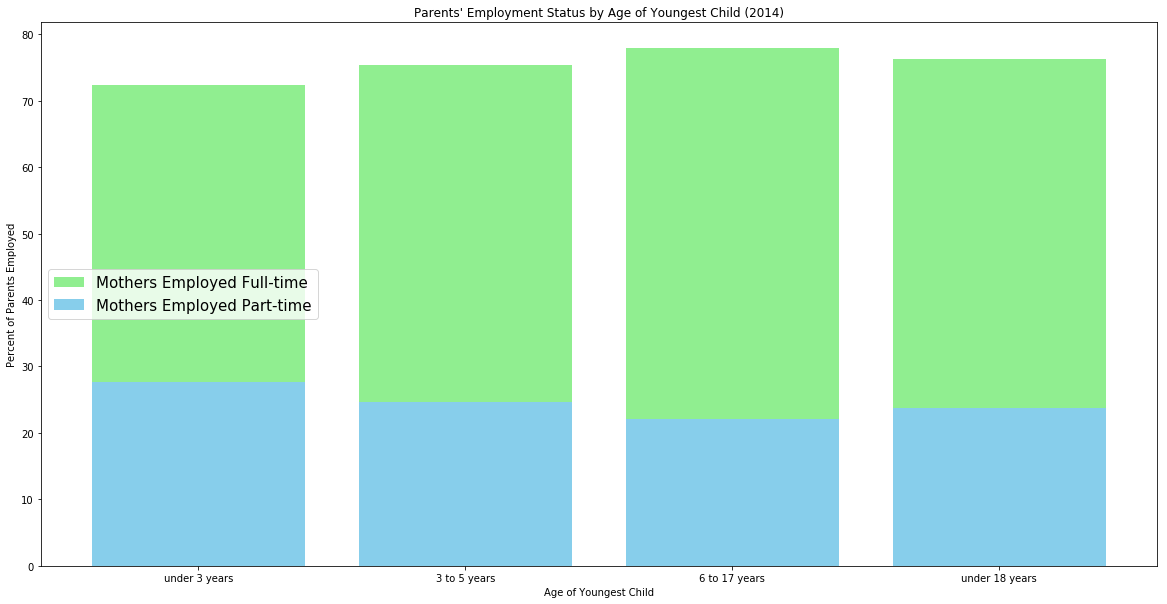

In [14]:
# plot employment status for parents
plt.figure(figsize=(20,10))
plt.title("Parents' Employment Status by Age of Youngest Child (2014)")
plt.xlabel("Age of Youngest Child")
plt.ylabel("Percent of Parents Employed")
mom1 = plt.bar(parent_data["Age of youngest child"], parent_data["Mothers Full-time"], color="lightgreen", label="Mothers Employed Full-time")
mom2 = plt.bar(parent_data["Age of youngest child"], parent_data["Mothers Part-time"], color="skyblue", label="Mothers Employed Part-time")
plt.legend(loc=6, fontsize=15)
plt.savefig("../images/parent-employment-status-by-youngest-child-bar-chart.png", bbox_inches="tight")
plt.show()

In [63]:
# read 2018 employment data by state
state_df = pd.read_csv('../data/workforce-by-state-2018.csv')
state_df.head()

,State,Population group,Civilian non-institutional population,Total,Percent of population,Total Employed,Percent of population Employed,Total Unemployed,Rate Unemployed
0,Alabama,Total,"3,847","2,208",57.4,"2,121",55.1,87,3.9
1,Alabama,Men,"1,820","1,180",64.9,"1,135",62.4,45,3.8
2,Alabama,Women,"2,027","1,027",50.7,986,48.6,42,4.1
3,Alabama,White,"2,711","1,567",57.8,"1,523",56.2,44,2.8
4,Alabama,"White, men","1,310",880,67.2,857,65.4,23,2.6


In [28]:
unique_states = state_df["State"].unique()
unique_states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [41]:
# stategroups = state_df.groupby(["Population group","State"])
stategroups = state_df.groupby(["State","Population group"])
# stategroups.mean().head()
stategroups.mean().head(30)

Percent of population  \
State   Population group                                           
Alabama Black or African American                           55.8   
        Black or African American, men                      57.4   
        Black or African American, women                    54.6   
        Hispanic or Latino ethnicity                        67.5   
        Hispanic or Latino ethnicity, men                   87.4   
        Men                                                 64.9   
        Men, 20 to 24 years                                 73.2   
        Men, 25 to 34 years                                 85.1   
        Men, 35 to 44 years                                 85.0   
        Men, 45 to 54 years                                 81.4   
        Men, 55 to 64 years                                 63.4   
        Men, 65 years and over                              20.4   
        Total                                               57.4   
        Total, 16 to 19 years                               31.9   
        Total, 20 to 24 years                               68.5   
        Total, 25 to 34 years                               78.5   
        Total, 35 to 44 years                               78.0   
        Total, 45 to 54 years                               73.7   
        Total, 55 to 64 years                               53.0   
        Total, 65 years and over                            16.9   
        White                                               57.8   
        White, men                                          67.2   
        White, women                                        49.0   
        Women                                               50.7   
        Women, 20 to 24 years                               63.8   
        Women, 25 to 34 years                               72.3   
        Women, 35 to 44 years                               71.5   
        Women, 45 to 54 years                               66.6   
        Women, 55 to 64 years                               43.7   
        Women, 65 years and over                            14.1   

                                           Percent of population Employed  \
State   Population group                                                    
Alabama Black or African American                                    52.0   
        Black or African American, men                               53.1   
        Black or African American, women                             51.1   
        Hispanic or Latino ethnicity                                 64.4   
        Hispanic or Latino ethnicity, men                            85.1   
        Men                                                          62.4   
        Men, 20 to 24 years                                          68.3   
        Men, 25 to 34 years                                          81.7   
        Men, 35 to 44 years                                          81.6   
        Men, 45 to 54 years                                          79.9   
        Men, 55 to 64 years                                          61.9   
        Men, 65 years and over                                       19.8   
        Total                                                        55.1   
        Total, 16 to 19 years                                        27.9   
        Total, 20 to 24 years                                        63.8   
        Total, 25 to 34 years                                        74.8   
        Total, 35 to 44 years                                        75.0   
        Total, 45 to 54 years                                        72.0   
        Total, 55 to 64 years                                        52.1   
        Total, 65 years and over                                     16.3   
        White                                                        56.2   
        White, men                                                   65.4   
        White, wom

In [56]:
women_employ = []
for state in unique_states:
    pop = state_df.loc[state_df['State'] == state, 'Population group']
    employed = state_df.loc[state_df['State'] == state, 'Percent of population Employed']
    df = pd.DataFrame({"Population Group": pop,
                    "Percent Employed": employed})
    women = df.loc[df["Population Group"] == "Women", "Percent Employed"]
    women_employ.append(women)

In [61]:
df

,Population Group,Percent Employed
1397,Total,62.0
1398,Men,67.5
1399,Women,56.3
1400,White,62.1
1401,"White, men",68.1
1402,"White, women",56.0
1403,Hispanic or Latino ethnicity,63.1
1404,"Hispanic or Latino ethnicity, men",69.7
1405,"Hispanic or Latino ethnicity, women",57.0
1406,"Total, 16 to 19 years",42.5


In [60]:
WY_pop = state_df.loc[state_df['State'] == 'Wyoming', 'Population group']
WY_employed = state_df.loc[state_df['State'] == 'Wyoming', 'Percent of population Employed']
WY_unemployed = state_df.loc[state_df['State'] == 'Wyoming', 'Rate Unemployed']

WY_df = pd.DataFrame({"Population Group": WY_pop,
                    "Percent Employed": WY_employed,
                    "Rate Unemployed": WY_unemployed})
WY_women = WY_df.loc[WY_df["Population Group"] == "Women", "Percent Employed"]
WY_women

1399    56.3
Name: Percent Employed, dtype: float64

In [7]:
AL_pop = state_df.loc[state_df['State'] == 'Alabama', 'Population group']
AL_employed = state_df.loc[state_df['State'] == 'Alabama', 'Percent of population Employed']
AL_unemployed = state_df.loc[state_df['State'] == 'Alabama', 'Rate Unemployed']

AL_df = pd.DataFrame({"Population Group": AL_pop,
                    "Percent Employed": AL_employed,
                    "Rate Unemployed": AL_unemployed})
AL_women = AL_df.loc[AL_df["Population Group"] == "Women", "Percent Employed"]
AL_women

2    48.6
Name: Percent Employed, dtype: float64

In [8]:
AK_pop = state_df.loc[state_df['State'] == 'Alaska', 'Population group']
AK_employed = state_df.loc[state_df['State'] == 'Alaska', 'Percent of population Employed']
AK_unemployed = state_df.loc[state_df['State'] == 'Alaska', 'Rate Unemployed']

AK_df = pd.DataFrame({"Population Group": AK_pop,
                    "Percent Employed": AK_employed,
                    "Rate Unemployed": AK_unemployed})
AK_women = AK_df.loc[AK_df["Population Group"] == "Women", "Percent Employed"]
AK_women

32    58.2
Name: Percent Employed, dtype: float64

In [9]:
CA_pop = state_df.loc[state_df['State'] == 'California', 'Population group']
CA_employed = state_df.loc[state_df['State'] == 'California', 'Percent of population Employed']
CA_unemployed = state_df.loc[state_df['State'] == 'California', 'Rate Unemployed']

CA_df = pd.DataFrame({"Population Group": CA_pop,
                    "Percent Employed": CA_employed,
                    "Rate Unemployed": CA_unemployed})
CA_women = CA_df.loc[CA_df["Population Group"] == "Women", "Percent Employed"]
CA_women

116    52.9
Name: Percent Employed, dtype: float64

In [10]:
NY_pop = state_df.loc[state_df['State'] == 'New York', 'Population group']
NY_employed = state_df.loc[state_df['State'] == 'New York', 'Percent of population Employed']
NY_unemployed = state_df.loc[state_df['State'] == 'New York', 'Rate Unemployed']

NY_df = pd.DataFrame({"Population Group": NY_pop,
                    "Percent Employed": NY_employed,
                    "Rate Unemployed": NY_unemployed})
NY_women = NY_df.loc[NY_df["Population Group"] == "Women", "Percent Employed"]
NY_women

897    53.6
Name: Percent Employed, dtype: float64